# Assignement 2 :Neural Network
#Group 131
 
#Thadaka Harish Kumar
#Jeswanth kumar Bhumireddy reddy 
#Konudula Niranjan reddy
#KaKarala Sairama Kalyan

In [1]:
#Importing necessary libaries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder




In [40]:
#reading csv file

In [41]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
#checking missing values

In [43]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
#converting catergorial to numeric

In [45]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Geography']=le.fit_transform(df['Geography'])

In [46]:
#correlation between varabiles

In [47]:
corr=df.corr()

In [10]:
#creating x and y varibles

In [11]:
x=df[[i for i in list(df.columns) if i not in ['Exited','Surname','RowNumber','CustomerId']]]
y=df['Exited']
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [64]:
#Feature scaling

In [65]:
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [66]:
# spliting the data into traning  and test 

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [70]:
#buidling the model
#taking sequential model from keras

In [71]:
model=Sequential()
model.add(Dense(16, input_dim=10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [72]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
7000/7000 [==============================] - 0s 67us/step - loss: 0.5167 - accuracy: 0.7741
Epoch 2/100
7000/7000 [==============================] - 0s 43us/step - loss: 0.4514 - accuracy: 0.8114
Epoch 3/100
7000/7000 [==============================] - 0s 48us/step - loss: 0.4344 - accuracy: 0.8207
Epoch 4/100
7000/7000 [==============================] - 0s 59us/step - loss: 0.4256 - accuracy: 0.8236
Epoch 5/100
7000/7000 [==============================] - 0s 63us/step - loss: 0.4186 - accuracy: 0.8284
Epoch 6/100
7000/7000 [==============================] - 0s 59us/step - loss: 0.4122 - accuracy: 0.8310
Epoch 7/100
7000/7000 [==============================] - 0s 59us/step - loss: 0.4062 - accuracy: 0.8334
Epoch 8/100
7000/7000 [==============================] - 0s 56us/step - loss: 0.3999 - accuracy: 0.8361
Epoch 9/100
7000/7000 [==============================] - 0s 62us/step - loss: 0.3921 - accuracy: 0.8381
Epoch 10/100
7000/7000 [==============================] - 0s 68u

7000/7000 [==============================] - 0s 35us/step - loss: 0.3214 - accuracy: 0.8667
Epoch 80/100
7000/7000 [==============================] - 0s 42us/step - loss: 0.3213 - accuracy: 0.8661
Epoch 81/100
7000/7000 [==============================] - 0s 38us/step - loss: 0.3210 - accuracy: 0.8690
Epoch 82/100
7000/7000 [==============================] - 0s 40us/step - loss: 0.3211 - accuracy: 0.8670
Epoch 83/100
7000/7000 [==============================] - 0s 41us/step - loss: 0.3206 - accuracy: 0.8673
Epoch 84/100
7000/7000 [==============================] - 0s 44us/step - loss: 0.3211 - accuracy: 0.8674
Epoch 85/100
7000/7000 [==============================] - 0s 41us/step - loss: 0.3212 - accuracy: 0.8674
Epoch 86/100
7000/7000 [==============================] - 0s 44us/step - loss: 0.3200 - accuracy: 0.8687
Epoch 87/100
7000/7000 [==============================] - 0s 44us/step - loss: 0.3199 - accuracy: 0.8659
Epoch 88/100
7000/7000 [==============================] - 0s 36us/st

In [59]:
y_pred = model.predict(x_test)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [60]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 85.8


In [61]:
history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=100, batch_size=64)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 0s 61us/step - loss: 0.3176 - accuracy: 0.8676 - val_loss: 0.3494 - val_accuracy: 0.8593
Epoch 2/100
7000/7000 [==============================] - 0s 40us/step - loss: 0.3175 - accuracy: 0.8653 - val_loss: 0.3509 - val_accuracy: 0.8563
Epoch 3/100
7000/7000 [==============================] - 0s 40us/step - loss: 0.3175 - accuracy: 0.8676 - val_loss: 0.3545 - val_accuracy: 0.8553
Epoch 4/100
7000/7000 [==============================] - 0s 43us/step - loss: 0.3181 - accuracy: 0.8670 - val_loss: 0.3508 - val_accuracy: 0.8557
Epoch 5/100
7000/7000 [==============================] - 0s 42us/step - loss: 0.3169 - accuracy: 0.8681 - val_loss: 0.3505 - val_accuracy: 0.8610
Epoch 6/100
7000/7000 [==============================] - 0s 41us/step - loss: 0.3173 - accuracy: 0.8680 - val_loss: 0.3504 - val_accuracy: 0.8583
Epoch 7/100
7000/7000 [==============================] - 0s 44us/step - loss

7000/7000 [==============================] - 0s 52us/step - loss: 0.3126 - accuracy: 0.8686 - val_loss: 0.3537 - val_accuracy: 0.8573
Epoch 57/100
7000/7000 [==============================] - 0s 57us/step - loss: 0.3125 - accuracy: 0.8699 - val_loss: 0.3564 - val_accuracy: 0.8577
Epoch 58/100
7000/7000 [==============================] - 0s 61us/step - loss: 0.3125 - accuracy: 0.8703 - val_loss: 0.3568 - val_accuracy: 0.8597
Epoch 59/100
7000/7000 [==============================] - 1s 80us/step - loss: 0.3127 - accuracy: 0.8713 - val_loss: 0.3546 - val_accuracy: 0.8600
Epoch 60/100
7000/7000 [==============================] - 1s 73us/step - loss: 0.3115 - accuracy: 0.8713 - val_loss: 0.3541 - val_accuracy: 0.8567
Epoch 61/100
7000/7000 [==============================] - 0s 60us/step - loss: 0.3125 - accuracy: 0.8706 - val_loss: 0.3559 - val_accuracy: 0.8590
Epoch 62/100
7000/7000 [==============================] - 0s 44us/step - loss: 0.3122 - accuracy: 0.8700 - val_loss: 0.3561 - val_a

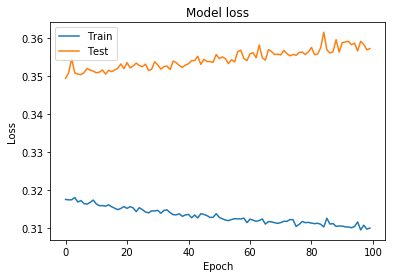

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

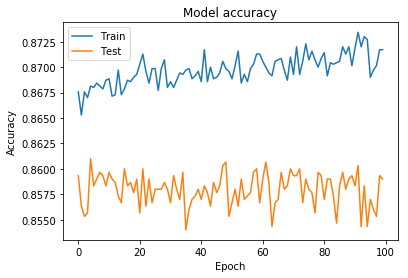

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()